# **INICIALIZAR AMBIENTE**

In [1]:
# Descargar paquete traductor de google
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=f75c560e62471fb0208915a3e29b1622433f621b398e04881a9c64f71c696adf
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [2]:
# Descargar paquete gráfico de palabras
!pip install wordcloud matplotlib

In [3]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from googletrans import Translator
from wordcloud import WordCloud, STOPWORDS

In [5]:
# Cargar datos
data = pd.read_csv('/content/Comentarios.csv')

# **ANÁLISIS DE SENTIMIENTOS**

In [6]:
# Traducir cada comentario de español a inglés para un análisis más efectivo
def traducir_comentario(comentario_traducir):
    traductor = Translator()
    traduccion = traductor.translate(comentario_traducir, src="es", dest="en")
    return traduccion.text

In [7]:
# Obtención de la polaridad del resultado del análisis de sentimiento
def obtener_polaridad(comentario):
    comentario_traducido = traducir_comentario(comentario)   # Llamar la función de traducción previa
    analisis = TextBlob(comentario_traducido)
    return analisis.sentiment.polarity

In [8]:
# Crear una nueva columna en base a la polaridad de cada uno de los comentarios
data['Polaridad'] = data['Comentario'].apply(obtener_polaridad)

In [9]:
# Visualizar los resultados
data

,Comentario,Polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [10]:
# Ordenar los valores mostrando la polaridad en orden descendente, es decir, mostrando los mejores comentarios primero
data.sort_values(by='Polaridad', ascending=False)

,Comentario,Polaridad
56,Uno de los mejores restaurantes en los que he ...,1.00
5,¡Increíble! El mejor lugar para cenar con amig...,1.00
21,Un lugar maravilloso con comida deliciosa y ex...,1.00
10,Excelente lugar. La comida y el servicio fuero...,1.00
26,Me encantó este lugar. La comida y el ambiente...,0.75
...,...,...
54,La comida no estaba bien cocida y el servicio ...,-1.00
50,Terrible experiencia. No recomendaría este lug...,-1.00
30,Nunca volveré. La comida estaba horrible y el ...,-1.00
4,El peor restaurante en el que he estado. No lo...,-1.00


In [11]:
# Contar cantidad de comentarios en base a la polaridad
polaridad_positiva = data[data['Polaridad'] > 0].value_counts().sum()
polaridad_negativa = data[data['Polaridad'] < 0].value_counts().sum()

# Mostrar resultado
print(f"Hay un total de {polaridad_positiva} comentarios con polaridad positiva y {polaridad_negativa} comentarios con polaridad negativa.")

Hay un total de 43 comentarios con polaridad positiva y 28 comentarios con polaridad negativa.


# **VISUALIZAR RESULTADOS**

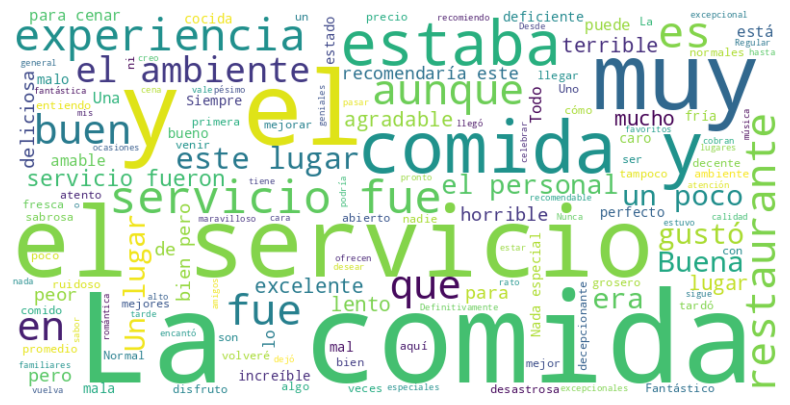

In [12]:
# Mostrar una visualización general de los comentarios por medio de un gráfico de nube de palabras

# Unir todas las filas de texto en una sola variable
comentarios = " ".join(row for row in data['Comentario'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comentarios)

# Mostrar el gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **VISUALIZAR RESULTADOS SEGMENTADOS**

In [13]:
# Separa comentarios en base a su polaridad

# Separar comentarios negativos
negativos = " ".join(row for row in data.loc[data['Polaridad'] < -0.4, 'Comentario'])

# Separar comentarios neutros
neutros = " ".join(row for row in data.loc[(data['Polaridad'] >= -0.4) & (data['Polaridad'] <= 0.4), 'Comentario'])

# Separar comentarios positivos
positivos = " ".join(row for row in data.loc[data['Polaridad'] > 0.4, 'Comentario'])

In [14]:
# Diccionario con palabras irrelevantes a la hora de la visualización
palabras_a_excluir = {"la", "comida", "y", "el", "servicio", "era", "este", "un", "una", "de", "es", "que", "para", "fue", "muy", "restaurante", "lugar", "estaba"}

# Excluir el diccionario creado de la nube de palabras
stopwords_personalizadas = STOPWORDS.union(palabras_a_excluir)

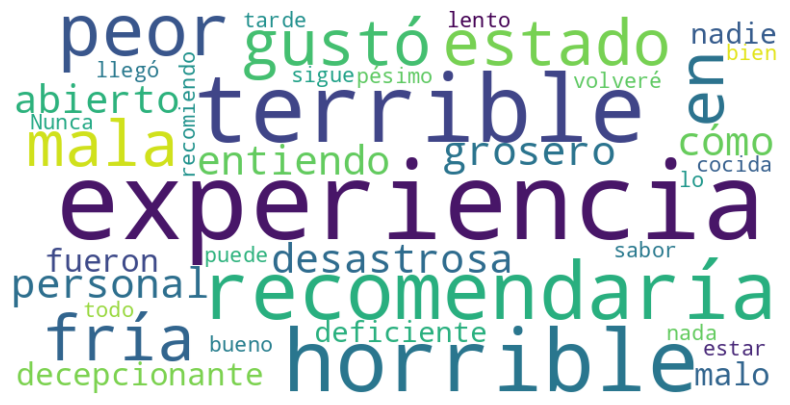

In [15]:
# Mostrar nube de palabras únicamente con comentarios NEGATIVOS

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_personalizadas).generate(negativos)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

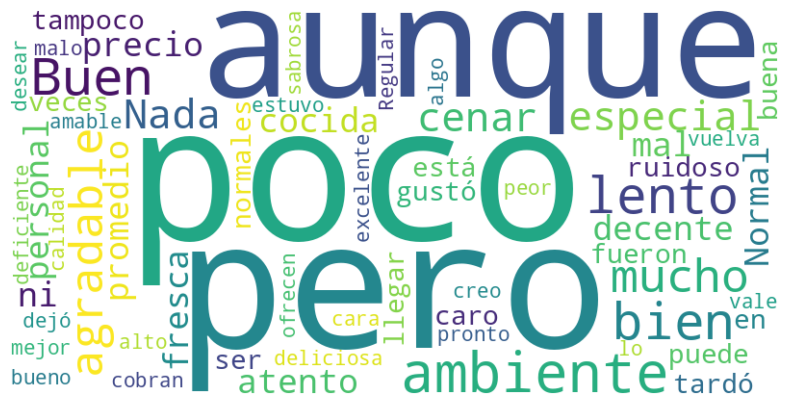

In [16]:
# Mostrar nube de palabras únicamente con comentarios NEUTROS

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_personalizadas).generate(neutros)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

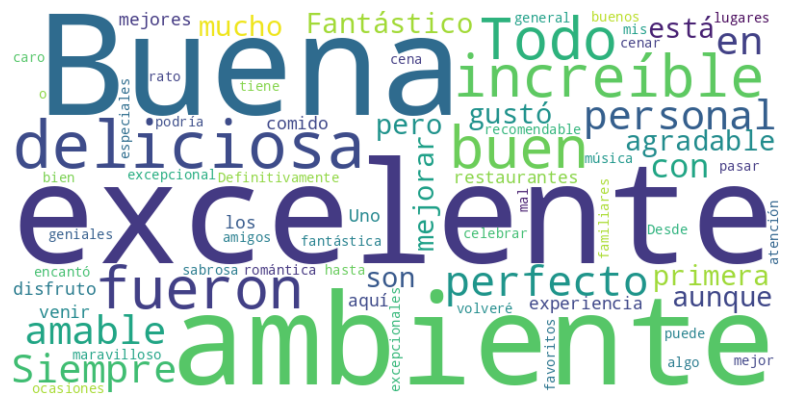

In [17]:
# Mostrar nube de palabras únicamente con comentarios POSITIVOS

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_personalizadas).generate(positivos)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()